# <center> Zestaw 7
## <center> Ryszard Pręcikowski
### <center> 401433

In [218]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl
from sympy import *
from sympy.abc import x
from sympy.calculus.util import continuous_domain
from typing import List
from decimal import Decimal
from pprint import  pprint
from random import random

In [3]:
def my_det_3x3(arr: List[List[Decimal]]):
    res = Decimal(0)
    for i in range(3):
        res += arr[0][(0-i) % 3] * arr[1][(1-i) % 3] * arr[2][(2-i) % 3]
        res -= arr[2][(0+i) % 3] * arr[1][(1+i) % 3] * arr[0][(2+i) % 3]
    return res

In [91]:
def gauss_elimination_pivoting(A, b, pp=False):
    n = len(A)
    for i in range(n):
        if A[i][i] == 0:
            raise Exception("PIVOT MUST BE NON ZERO")
        col = [A[j+i][i] for j in range(n-i)]

        max_ind = col.index(max(col))
        max_ind += i

        if max_ind != i:
            A[i], A[max_ind], b[i], b[max_ind] = A[max_ind], A[i], b[max_ind], b[i]
        print("i", i)
        for k in range(i+1, n):
            print('k', k)

            f = A[k][i] / A[i][i]
            for j in range(i, n):
                A[k][j] -= A[i][j]*f

            b[k] -= b[i]*f

            for l, r in enumerate(A):
                for v in r:
                    if pp:
                        print('{: 3.2f}'.format(v), end=' ')
                    else:
                        print('{: ^9.2e}'.format(v), end=' ')
                if pp:
                    print('|  {: 3.2f}'.format(b[l]))
                else:
                    print('|  {: ^9.2e}'.format(b[l]))

            print()

## Zadanie 1

In [92]:
A = np.array([i/10 for i in range(1, 10)]).reshape(3, 3)
b = np.array([0.1, 0.3, 0.5])
print(A)

[[0.1 0.2 0.3]
 [0.4 0.5 0.6]
 [0.7 0.8 0.9]]


In [93]:
print("numpy det", npl.det(A)) #TAK NA SERIO TO DET = 0 !!!!!!!!!!!!

A_exact = [[Decimal(1 + i + (j*3)) / 10 for i in range(3)] for j in range(3)]
print('exact det', my_det_3x3(A_exact))

numpy det 6.661338147750926e-18
exact det 0.000


Ten układ równań ma nieskończenie wiele rozwiązań w postaci:

$y=- 2z +\frac13 $

$x = z + \frac13$

Eliminacja Gaussa z częściowym przesuwaniem elementu wiodącego nie
powiedzie się w momencie obliczania wartości ostatniego wiersza,
ponieważ na przekątnej będziemy mieli zero.

$\begin{bmatrix}
1 & 2 & 3 & | & 1\\
4 & 5 & 6 & | & 3\\
7 & 8 & 9 & | & 5\\
\end{bmatrix}$

$\begin{bmatrix}
7 & 8 & 9 & | & 5\\
4 & 5 & 6 & | & 3\\
1 & 2 & 3 & | & 1\\
\end{bmatrix}$

$\begin{bmatrix}
7 & 8 & 9 & | & 5\\
0 & \frac37 & \frac67 & | & \frac17\\
0 & \frac67 & \frac{12}7 & | & \frac27\\
\end{bmatrix}$

$\begin{bmatrix}
7 & 8 & 9 & | & 5\\
0 & \frac67 & \frac{12}7 & | & \frac27\\
0 & 0 & 0& | & 0\\
\end{bmatrix}$

In [94]:
gauss_elimination_pivoting([[(1 + i + (j*3)) for i in range(3)] for j in range(3)],
                           [1, 3, 5])

i 0
k 1
7.00e+00  8.00e+00  9.00e+00  |  5.00e+00 
0.00e+00  4.29e-01  8.57e-01  |  1.43e-01 
1.00e+00  2.00e+00  3.00e+00  |  1.00e+00 

k 2
7.00e+00  8.00e+00  9.00e+00  |  5.00e+00 
0.00e+00  4.29e-01  8.57e-01  |  1.43e-01 
0.00e+00  8.57e-01  1.71e+00  |  2.86e-01 

i 1
k 2
7.00e+00  8.00e+00  9.00e+00  |  5.00e+00 
0.00e+00  8.57e-01  1.71e+00  |  2.86e-01 
0.00e+00  5.55e-17  1.11e-16  |  2.78e-16 

i 2


In [98]:
for i, v in enumerate(npl.solve(A, b)):
    print('x'+str(i) , '=', '{: .5f}'.format(v))

x0 =  0.16146
x1 =  0.67708
x2 = -0.17188


Wyniki zgadzają się z rozwiązaniem uzyskanym dla dokładnej arytmetyki,
jest to szczególne rozwiązanie tego układu z dokładnością do około 16 miejsca po przecinku.

ponieważ liczby te nie są reprezentowane dokładnie w pamięci komputera, to macierz A nie jest macierzą osobliwą.

In [103]:
A_inv = npl.inv(A)
print("inverse matrix")
print(A_inv)
print("\ncond(A) = ", npl.cond(A))
print("\naccuracy: ", floor(np.log10(npl.cond(A))))

inverse matrix
[[-4.50359963e+15  9.00719925e+15 -4.50359963e+15]
 [ 9.00719925e+15 -1.80143985e+16  9.00719925e+15]
 [-4.50359963e+15  9.00719925e+15 -4.50359963e+15]]

cond(A) =  2.1118968335779856e+16

accuracy:  16


## Zadanie 2

In [104]:
eps = Symbol('{\\epsilon}')
M = Matrix([[1, 1+eps],
            [1-eps, 1]])

M

Matrix([
[             1, {\epsilon} + 1],
[1 - {\epsilon},              1]])

In [110]:
m_det = M.det()
print("det(M) =")
m_det

det(M) =


{\epsilon}**2

In [116]:
a = -1.0
while -1.0 + a < -1.0:
    a /= 4.0
a*=4

b = 1.0
while 1.0 + b > 1.0:
    b /= 4.0
b*=4

print('(a, b) = ({}, {})'.format(a, b))

(a, b) = (-2.220446049250313e-16, 2.220446049250313e-16)


In [117]:
l, u, _ = M.LUdecomposition()
l.simplify()
u.simplify()

In [118]:
l

Matrix([
[             1, 0],
[1 - {\epsilon}, 1]])

In [119]:
u

Matrix([
[1, {\epsilon} + 1],
[0,  {\epsilon}**2]])

In [121]:
print("det(U) =")
u.det()

det(U) =


{\epsilon}**2

Macierz $U$ będzie osobliwa dla takiego samego zakresu wartości co macierz A.

## zadanie 3

In [131]:
A = np.array([[3, 2, -1],
              [2, -2, 4],
              [-1, 0.5, -1]])
b = np.array([1, -2, 0])

In [134]:
exact = np.array([1, -2, -2])

In [234]:
relative_error = lambda true_val, val: abs((true_val - val)/true_val)
absolute_error = lambda true_val, val: abs((true_val - val))
residual = lambda solution: abs(b-A@solution)

relative_errors = []
absolute_errors = []
residuals = []

D_o = [np.diag([1, 1, 1]),
       np.diag([0.125, 0.5, 0.25]),
       np.diag([-10**5, 10**-3, 10**-5]),
       np.diag([-2**-8, -20**8, 5**3])]

for D in D_o:
    print('\n'+'*'*80+'\n')
    pprint(D)
    print("\n\ncond(DA) = {:<20.3f}\n".format(npl.cond(D @ A)))

    curr = npl.solve(D @ A , D @ b)
    for i, v in enumerate(curr):
        print("x{} = {: }".format(i, v))

    print("\nabsolute error:")
    for i, a_error in enumerate(absolute_error(exact, curr)):
        print("x{} = {: .10e}".format(i, a_error))
        absolute_errors.append(a_error)

    print("\nrelative error:")
    for i, r_error in enumerate(relative_error(exact, curr)):
        print("x{} = {: .10e}".format(i, r_error))
        relative_errors.append(r_error)

    print("\nresidual:")
    for i, residu in enumerate(residual( curr)):
        print("x{} = {: .10e}".format(i, residu))
        residuals.append(residu)

for i in range(30):
    D = np.diag([(i+1+1*random())**(i+2), -(i+2*(i+random()))**(i+1), (4*(random()*2 + 2))**-(i+1)])
    curr = npl.solve(D @ A , D @ b)

    for i, a_error in enumerate(absolute_error(exact, curr)):
        absolute_errors.append(a_error)
    for i, r_error in enumerate(relative_error(exact, curr)):
        relative_errors.append(r_error)
    for i, residu in enumerate(residual( curr)):
        residuals.append(residu)


********************************************************************************

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])


cond(DA) = 32.713              

x0 =  0.9999999999999994
x1 = -1.9999999999999984
x2 = -1.9999999999999984

absolute error:
x0 =  5.5511151231e-16
x1 =  1.5543122345e-15
x2 =  1.5543122345e-15

relative error:
x0 =  5.5511151231e-16
x1 =  7.7715611724e-16
x2 =  7.7715611724e-16

residual:
x0 =  2.2204460493e-16
x1 =  1.7763568394e-15
x2 =  2.2204460493e-16

********************************************************************************

array([[0.125, 0.   , 0.   ],
       [0.   , 0.5  , 0.   ],
       [0.   , 0.   , 0.25 ]])


cond(DA) = 62.381              

x0 =  1.0000000000000009
x1 = -2.0000000000000018
x2 = -2.0000000000000013

absolute error:
x0 =  8.8817841970e-16
x1 =  1.7763568394e-15
x2 =  1.3322676296e-15

relative error:
x0 =  8.8817841970e-16
x1 =  8.8817841970e-16
x2 =  6.6613381478e-16

residual:
x0 =  4.4408920985e-16
x1 =  0.00

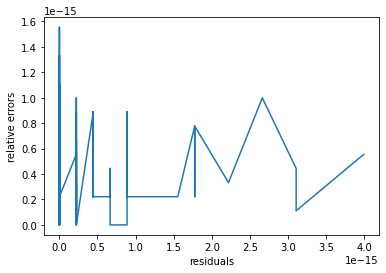

In [235]:
relative_errors, residuals = zip(*sorted(zip(relative_errors, residuals), key=lambda v:v[1]))

plt.plot(residuals, relative_errors)
plt.ylabel('relative errors')
plt.xlabel('residuals')
plt.show()